In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Import data and Cleaning

In [2]:
#import data

file_path=r'Laptop.csv'

laptop = pd.read_csv(file_path)


In [3]:
laptop.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


Remove 'Unnamed' column

In [4]:
#delete Unnamed column


del laptop['Unnamed: 0']
laptop.columns


Index(['Brand', 'Model', 'Series', 'Processor', 'Processor_Gen', 'RAM',
       'Hard_Disk_Capacity', 'OS', 'Rating', 'Price'],
      dtype='object')

## Viewing overall of the dataset

In [5]:
#check for number of values and number of null values
laptop.shape[0]
laptop.isnull().any()

Brand                 False
Model                  True
Series                 True
Processor              True
Processor_Gen          True
RAM                    True
Hard_Disk_Capacity     True
OS                     True
Rating                False
Price                 False
dtype: bool

In [6]:
#viewing overall data types
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               130 non-null    object 
 1   Model               116 non-null    object 
 2   Series              80 non-null     object 
 3   Processor           123 non-null    object 
 4   Processor_Gen       123 non-null    object 
 5   RAM                 122 non-null    float64
 6   Hard_Disk_Capacity  122 non-null    object 
 7   OS                  122 non-null    object 
 8   Rating              130 non-null    float64
 9   Price               130 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 10.3+ KB


## Data Cleaning

Checking unique value of 'Brand' column

In [7]:
laptop.Brand.unique()

array(['DELL', 'ASUS', 'Lenovo', 'HP', 'acer', 'APPLE', 'MSI', 'realme',
       'MICROSOFT'], dtype=object)

Convert 'Brand' value to lower for unnecessary case error and duplicates

In [8]:
laptop['Model']=laptop['Model'].str.lower()

In [9]:
laptop['Model'].unique()

array(['inspiron', 'vostro', 'vivobook', 'tuf', 'ryzen', 'ideapad', nan,
       'aspire', 'thinkpad', 'pavilion', '2020', 'gf63', 'rog', 'nitro',
       'asus', 'hp', 'book', 'katana', 'macbook', 'notebook',
       'chromebook', 'surface', 'envy', 'swift', 'zenbook', 'apu', '3000',
       '250-g6', 'travelmate', '15q', 'v15'], dtype=object)

Checking for unique values of 'Processor' column

In [10]:
laptop['Processor'].unique()
#laptop['Processor_Gen'].unique()

array(['i3', 'i5', '3250U', '3050U', '5600U', '-', '5500U', 'i7', '5300U',
       '5600H', '3450U', nan, '4800HS', '4600H', '4800H', 'R3-3250U',
       'AMD', 'A9'], dtype=object)

There are a lot of not so meaningful values in the 'Processor' column, we need further adjustment to this column

To better indicate the Processor spec of the laptop, added new column to present the Processor brand

In [11]:
#creating a new column indication processor brand
laptop['Processor1']=laptop['Processor']

def processor_alter(p):
    if p == 'i3' or p== 'i5' or p=='i7': 
        p = 'Intel'
        
    elif p == '3250U' or p== '3050U' or p== '5600U' or p=='5500U' or p== '5300U' or p == '5600H' or p == '3450U' or p=='4800HS' or p== '4600H' or p== '4800H' or p=='R3-3250U':
        p = 'AMD'
        
    else: 
        p= 'Others'
        
    return p

laptop['Processor1'] = laptop['Processor1'].apply(processor_alter)
        
laptop = laptop.rename(columns = {'Processor1':'Processor_brand'})
#laptop.Processor = laptop['Model'].apply(lambda x: 'AMD' if x =='vivobook' or x =='ryzen' else 'Celeron')



In [12]:

#replace incorrect data 

laptop[(laptop.Processor == '-') & (laptop.Model == 'vivobook')] = laptop[(laptop.Processor == '-') & (laptop.Model == 'vivobook')].replace('-','Others')

laptop[(laptop.Processor == '-')]=laptop[(laptop.Processor == '-')].replace('-','Others')



In [13]:
laptop.groupby('OS').count()

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price,Processor_brand
OS,,,,,,,,,,
128 GB SSD,1,1,1,1,1,1,1,1,1,1
256 GB SSD,14,13,7,14,14,14,14,14,14,14
Chrome OS,2,2,2,2,2,2,2,2,2,2
DOS,5,5,2,5,5,5,5,5,5,5
Windows 10,10,8,2,10,10,10,10,10,10,10
Windows 10 Home,46,42,36,46,46,46,46,46,46,46
Windows 11 Home,44,37,22,44,44,44,44,44,44,44


In [14]:
laptop[laptop.OS.isin(['128 GB SSD','256 GB SSD'])]



,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand
3,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440,Intel
38,ASUS,vivobook,15,i5,11th,8.0,1 TB HDD,256 GB SSD,4.3,52940,Intel
49,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,45340,Intel
59,acer,nitro,Ryzen,5600H,-,8.0,1 TB HDD,256 GB SSD,4.5,72940,AMD
63,HP,pavilion,Gaming,4800H,-,16.0,1 TB HDD,256 GB SSD,4.5,75940,AMD
65,ASUS,vivobook,K15,i5,11th,16.0,1 TB HDD,256 GB SSD,4.7,66940,Intel
71,ASUS,vivobook,K15,i5,11th,16.0,1 TB HDD,256 GB SSD,4.3,65940,Intel
80,DELL,inspiron,Ryzen,3450U,-,8.0,1 TB HDD,256 GB SSD,3.9,49240,AMD
92,DELL,vostro,NaN,i3,11th,4.0,1 TB HDD,256 GB SSD,4.1,43126,Intel
95,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.1,48940,Intel


The 'OS' column does not indicate the data it meant to be presented, this probably be data migration error

A laptop can have two hard disk units so these wrong OS values in fact indicate the size of the second hard disk unit of the laptop

We will copy this OS column into another column and rename this column as '2nd_hard_disk'

In [15]:

laptop['2nd_hard_disk'] = laptop['OS']

laptop['2nd_hard_disk']=laptop['2nd_hard_disk'].replace(['Chrome OS','DOS','Windows 10','Windows 10 Home','Windows 11 Home'], np.NaN)

laptop.head()

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk
0,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040,Intel,NaN
1,DELL,vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840,Intel,NaN
2,ASUS,vivobook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940,Intel,NaN
3,DELL,inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440,Intel,256 GB SSD
4,ASUS,tuf,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940,Intel,NaN


Replace the incorrect values for OS column

In [16]:
#replace the incorrect value of 'acer swift 3' with correct values, because it was the only
#record with '128 GB SSD' for 'OS' (record 106)

laptop.OS= laptop.OS.replace(to_replace ='128 GB SSD', value = 'Windows 10')



The OS for these devices could be either windows 10, windows 10 Home or windows 11 Home, except for one specific device with 4GB RAM which cannot handle windows 11 Home. Hence, we will fill in random values of the three except for that device 

In [17]:

os_list = ['Windows 10 Home', 'Windows 11 Home', 'Windows 10']

def os_alter(OS):
    if OS == '256 GB SSD':
        OS = np.random.choice(os_list)
    return OS

laptop.OS= laptop['OS'].apply(os_alter)


The 'Price' values missing decimal places, we will fix that by multiply it by 0.01

In [18]:

laptop.Price = laptop['Price']*0.01

Filling the rest of NaN values for the 'OS' column

In [19]:

laptop[laptop.OS.isna()]

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price,Processor_brand,2nd_hard_disk
45,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.7,849.4,Others,NaN
70,DELL,vostro,Ryzen,R3-3250U,-,NaN,NaN,NaN,3.9,373.4,AMD,NaN
75,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1199.4,Others,NaN
81,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1059.4,Others,NaN
87,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.7,1109.4,Others,NaN
88,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.6,1299.9,Others,NaN
90,APPLE,2020,Macbook,NaN,NaN,NaN,NaN,NaN,4.6,1299.9,Others,NaN
120,APPLE,macbook,Air,NaN,NaN,NaN,NaN,NaN,4.5,1199.4,Others,NaN


Because Apple device will run on 'MacOS', we will fill in just that

In [20]:
#the apple device will have 'MacOS' as its 'OS'
laptop.OS = laptop.OS.replace(np.nan, 'MacOS')
laptop[laptop.OS == 'MacOS']


#there is one DELL device that need adjustment, the index of it is 70
laptop[laptop.index == 70] = laptop[laptop.index == 70].replace('MacOS','Windows 10 Home')



In [21]:
laptop.loc[laptop.Series.isnull()].count()

Brand                 50
Model                 36
Series                 0
Processor             50
Processor_Gen         50
RAM                   50
Hard_Disk_Capacity    50
OS                    50
Rating                50
Price                 50
Processor_brand       50
2nd_hard_disk          7
dtype: int64

In [22]:
laptop.loc[laptop.Model.isnull()].count()

Brand                 14
Model                  0
Series                 0
Processor             14
Processor_Gen         14
RAM                   14
Hard_Disk_Capacity    14
OS                    14
Rating                14
Price                 14
Processor_brand       14
2nd_hard_disk          1
dtype: int64

There are still null values for 'Model', 'Series' columns and there are insufficient information to fill in the missing values so it will be left as it is 

## Exploratory Analysis

For better visualization, grouping the data set by 'Brand' and 'Model'. This visualization will focus on the distribution amount of known models among existing brands in the dataset  

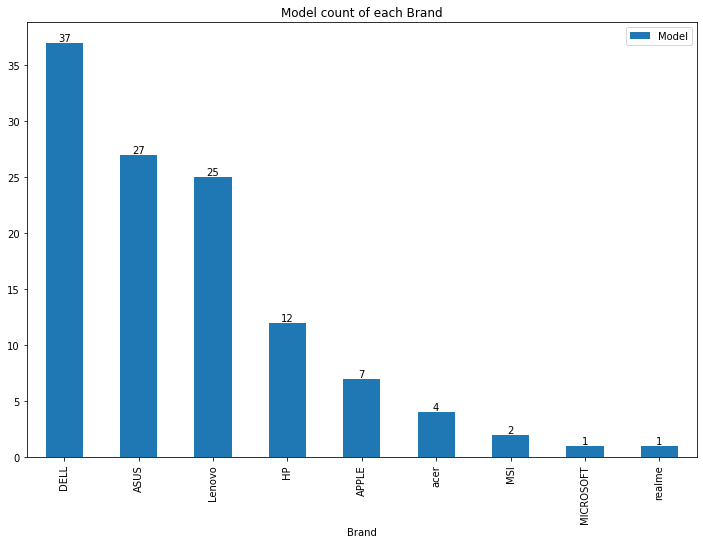

In [23]:
brand_count=laptop.groupby('Brand')[['Model']].count()
brand_count=brand_count.sort_values('Model',ascending = False)

#import matplotlib and setting the graph to show consistently
import matplotlib.pyplot as plt
%matplotlib inline

#visualization creating
viz1=brand_count.plot(kind='bar',figsize= (12,8))

#set graph title
plt.title('Model count of each Brand')

#set data lable for the graph 
viz1.bar_label(viz1.containers[0],label_type='edge');

Findings: The top 3 with most counted models were DELL, ASUS and Lenovo



It's also interesting to learn about the popularity of each processing cores among the laptops in the dataset

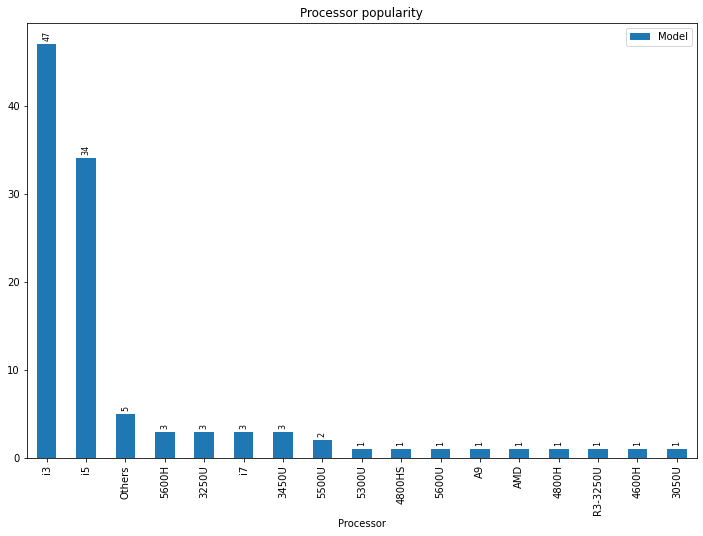

In [24]:
#create sub dataframe for visualization
processor_c = laptop.groupby('Processor')[['Model']].count()
processor_c = processor_c.sort_values('Model',ascending = False)

#create a bar graph
viz2=processor_c.plot(kind='bar', figsize=(12,8))

#setting graph title
plt.title('Processor popularity')

#creating data label for the graph
viz2.bar_label(viz2.containers[0], label_type='edge', color='black',rotation= 90, fontsize=8, padding = 3);





Findings: The i3 and i5 cores took dominance among the laptops in the dataset

Next is a visualization to better understand RAM sizes (GB) popularities among the laptops in the dataset 

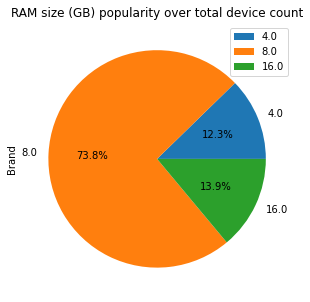

In [25]:
#pie chart for Ram size 
#sub dataframe for the pie chart 
ram_size = laptop.groupby('RAM')[['Brand']].count()

#pie chart creating 
ram_pie = ram_size.plot(kind='pie',y='Brand', figsize=(5,5),autopct='%.1f%%')

#set up chart's name
ram_pie=plt.title('RAM size (GB) popularity over total device count')


Findings: Ram size of 8GB is the most popular among the laptops in the data set

## Correlations between attributes and 'Price'

We curios about what could be affecting the Price of the laptop

In [26]:
laptop.corr()

,RAM,Rating,Price
RAM,1.000000,0.240383,0.685747
Rating,0.240383,1.000000,0.442159
Price,0.685747,0.442159,1.000000


In [28]:
laptop.corr()['Price']

RAM       0.685747
Rating    0.442159
Price     1.000000
Name: Price, dtype: float64

The numeric columns like RAM and Rating have heavy correlation with the laptop Price, we will later visualize the non numeric attributes and also the numeric one to better understand it

/Users/Me/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


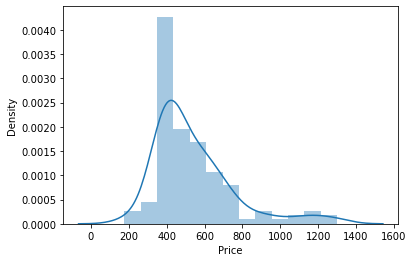

In [30]:

import seaborn as sns
sns.distplot(laptop['Price'])
plt.show()

Laptop price is skewed to the left side of the distribution. Laptop are sold most at the price of 400$, which is an affordable price

Next, we will investigate the price range base on the brand of the laptop

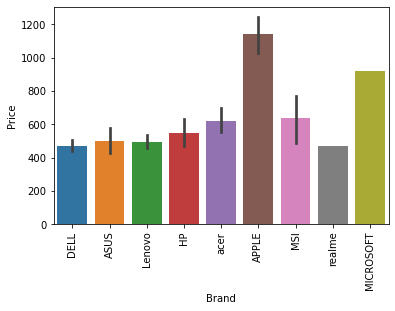

In [28]:
#creating barplot
sns.barplot(x=laptop['Brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

Finding: 'Apple' & 'Microsoft' has a very high average price of 800, only Apple goes above 1000$ price point


It is also interesting to learn if the Rating is affected by the Price of the laptop

<AxesSubplot:xlabel='Rating', ylabel='Price'>

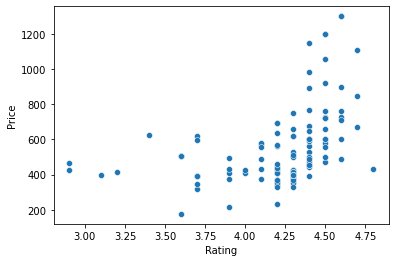

In [29]:
sns.scatterplot(x=laptop['Rating'],y=laptop['Price']) 

The most dense rating group is around 4.00 to 4.625 of Rating and 300$ to 800$ in Price.
It is shown that there is a positive correlation between Price and Rating, the higher the Price the higher the Rating

We will also check for the correlation between RAM size and the laptop's Price

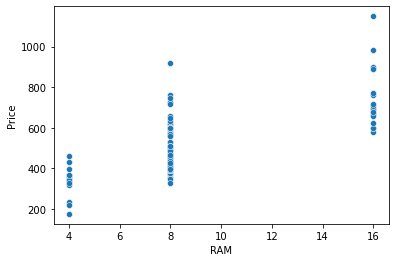

In [30]:
sns.scatterplot(x=laptop['RAM'], y=laptop['Price']);


Finding: The higher the RAM size, the higher the Price

Next is correlation between Hard disk and Price

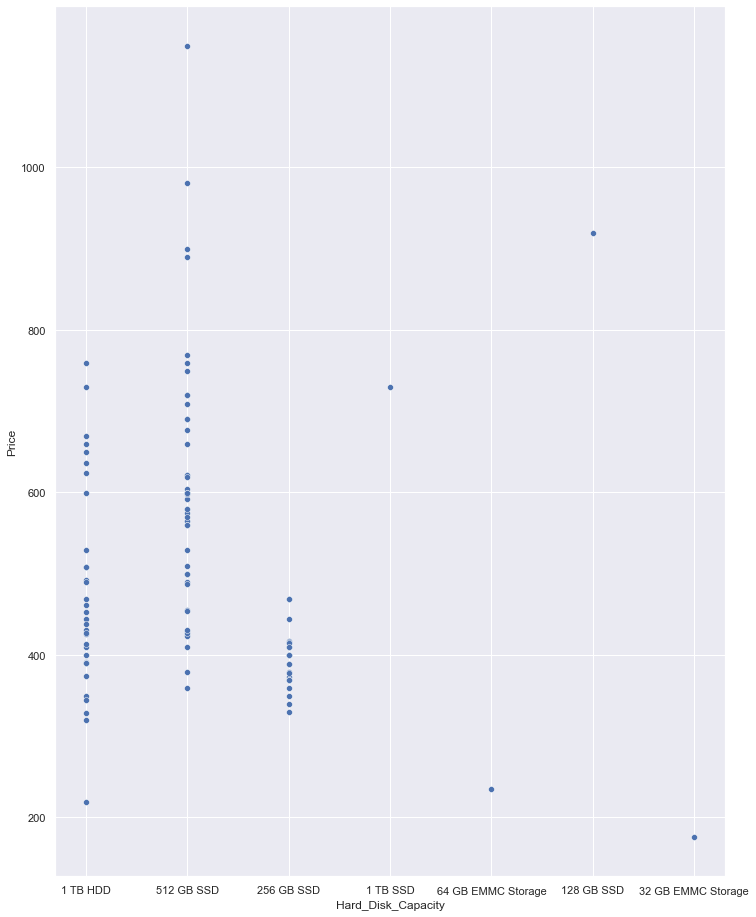

In [53]:
sns.scatterplot(x=laptop['Hard_Disk_Capacity'], y=laptop['Price']);
sns.set(rc={'figure.figsize':(11,16)})

No, the hard disk capacity does not have an critical impact on the price of the laptop.
Most of the population lies on 1TB HDD, 512GB SSD, 256GB SSD

Next is Correlation between Processor Brand and laptop Price

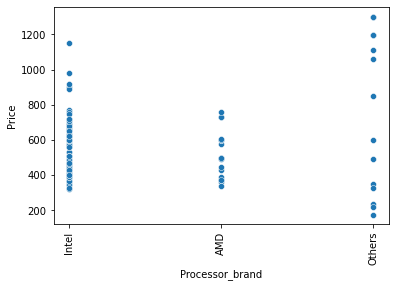

In [32]:
sns.scatterplot(x=laptop['Processor_brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

We can see from the graph that Intel and AMD laptops have much concentrate price range than the other Processor brand

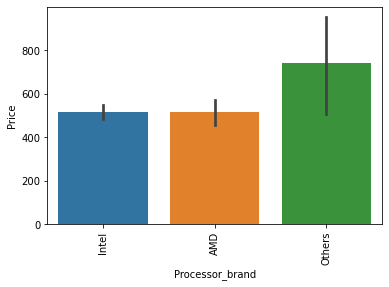

In [33]:
sns.barplot(x=laptop['Processor_brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

AMD and Intel, both of them have a lower than mean Price in the dataset